# Imports 

In [1]:
import pandas as pd 
import ast
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None)

# Data Imports 

In [3]:
events = pd.read_json('events (1).json') 

In [5]:
events.head()

,gameId,game_event_id,earlyDistribution,pressurePlayer,endTime,heightType,gameEventType,videoMissing,playerOffType,gameClock,duration,playerOn,pressureType,initialTouchType,endType,bodyType,touches,playerOff,subType,updatedAt,startTime,videoUrl,scoreValue,advantageType,team,outType,setpieceType,possessionEvents,player,touchesInBox,insertedAt,formattedGameClock,otherPlayer,videoAngleType,video
0,3812,6497466,NaN,None,141.008,G,FIRSTKICKOFF,False,None,0,0.000,None,None,None,None,L,1.0,None,S,2022-11-21T19:00:42,141.008,epitome.pff.com/87f7e9ab-da77-4fab-affd-173bbe...,NaN,None,"{'id': '366', 'name': 'Netherlands'}",None,K,"[{'ballCarryEvent': None, 'challengeEvent': No...","{'id': '3315', 'nickname': 'Vincent Janssen'}",NaN,2022-11-21T18:37:47,00:00,NaN,None,None
1,3812,6497474,NaN,None,144.645,G,OTB,False,None,1,2.570,None,None,None,None,R,3.0,None,S,2022-11-21T19:00:42,142.075,epitome.pff.com/87f7e9ab-da77-4fab-affd-173bbe...,NaN,None,"{'id': '366', 'name': 'Netherlands'}",None,None,"[{'ballCarryEvent': None, 'challengeEvent': No...","{'id': '1522', 'nickname': 'Frenkie de Jong'}",NaN,2022-11-21T18:38:06,00:01,NaN,None,None
2,3812,6497478,NaN,None,147.781,G,OTB,False,None,5,0.901,None,None,None,None,L,2.0,None,S,2022-11-21T19:00:42,146.880,epitome.pff.com/87f7e9ab-da77-4fab-affd-173bbe...,NaN,None,"{'id': '366', 'name': 'Netherlands'}",None,None,"[{'ballCarryEvent': None, 'challengeEvent': No...","{'id': '8026', 'nickname': 'Daley Blind'}",NaN,2022-11-21T18:38:18,00:05,NaN,None,None
3,3812,6497488,NaN,"{'id': '3858', 'nickname': 'Idrissa Gueye'}",149.082,G,OTB,False,None,8,0.000,None,P,None,None,R,1.0,None,S,2022-11-21T19:01:13,149.082,epitome.pff.com/87f7e9ab-da77-4fab-affd-173bbe...,NaN,None,"{'id': '366', 'name': 'Netherlands'}",None,None,"[{'ballCarryEvent': None, 'challengeEvent': No...","{'id': '1522', 'nickname': 'Frenkie de Jong'}",NaN,2022-11-21T18:38:33,00:08,NaN,None,None
4,3812,6497491,NaN,None,152.653,G,OTB,False,None,9,2.336,None,None,None,None,R,3.0,None,S,2022-11-21T19:00:42,150.317,epitome.pff.com/87f7e9ab-da77-4fab-affd-173bbe...,NaN,None,"{'id': '366', 'name': 'Netherlands'}",None,None,"[{'ballCarryEvent': None, 'challengeEvent': No...","{'id': '284', 'nickname': 'Nathan Aké'}",NaN,2022-11-21T18:38:44,00:09,NaN,None,None


In [7]:
# Filtering for games that argentina played in 

# List of game IDs for Argentina's games
argentina_game_ids = [3816, 3835, 3850, 10511, 10517, 10503, 10514]

# Filter events_cleaned for these game IDs
argentina_events = events[events['gameId'].isin(argentina_game_ids)]

# Display the filtered DataFrame
argentina_events

# Optionally, check the number of rows or unique game IDs in the filtered dataset
print("Number of events for Argentina's games:", len(argentina_events))
print("Unique game IDs in filtered dataset:", argentina_events['gameId'].unique())

Number of events for Argentina's games: 10972
Unique game IDs in filtered dataset: [ 3816  3835  3850 10503 10511 10514 10517]


In [9]:
argentina_events

,gameId,game_event_id,earlyDistribution,pressurePlayer,endTime,heightType,gameEventType,videoMissing,playerOffType,gameClock,duration,playerOn,pressureType,initialTouchType,endType,bodyType,touches,playerOff,subType,updatedAt,startTime,videoUrl,scoreValue,advantageType,team,outType,setpieceType,possessionEvents,player,touchesInBox,insertedAt,formattedGameClock,otherPlayer,videoAngleType,video
5515,3816,6500893,NaN,None,101.969,G,FIRSTKICKOFF,False,None,0,0.000,None,None,None,None,R,1.0,None,S,2022-11-22T14:57:42,101.969,epitome.pff.com/d7ffb3e6-2fff-4403-a75e-85df7f...,NaN,None,"{'id': '382', 'name': 'Saudi Arabia'}",None,K,"[{'ballCarryEvent': None, 'challengeEvent': No...","{'id': '14011', 'nickname': 'Saleh Al-Shehri'}",NaN,2022-11-22T12:49:06,00:00,NaN,None,None
5516,3816,6500923,NaN,None,104.338,G,OTB,False,None,1,1.235,None,None,None,None,R,3.0,None,S,2022-11-22T14:57:42,103.103,epitome.pff.com/d7ffb3e6-2fff-4403-a75e-85df7f...,NaN,None,"{'id': '382', 'name': 'Saudi Arabia'}",None,None,"[{'ballCarryEvent': None, 'challengeEvent': No...","{'id': '14003', 'nickname': 'Mohamed Kanno'}",NaN,2022-11-22T12:50:47,00:01,NaN,None,None
5517,3816,6500912,NaN,"{'id': '8138', 'nickname': 'Lautaro Martinez'}",105.272,G,OTB,False,None,3,0.000,None,P,None,None,R,1.0,None,S,2022-11-22T14:57:42,105.272,epitome.pff.com/d7ffb3e6-2fff-4403-a75e-85df7f...,NaN,None,"{'id': '382', 'name': 'Saudi Arabia'}",None,None,"[{'ballCarryEvent': None, 'challengeEvent': No...","{'id': '14011', 'nickname': 'Saleh Al-Shehri'}",NaN,2022-11-22T12:50:27,00:03,NaN,None,None
5518,3816,6500928,NaN,None,108.041,G,OTB,False,None,4,1.902,None,None,None,None,R,3.0,None,S,2022-11-22T14:57:42,106.139,epitome.pff.com/d7ffb3e6-2fff-4403-a75e-85df7f...,NaN,None,"{'id': '382', 'name': 'Saudi Arabia'}",None,None,"[{'ballCarryEvent': None, 'challengeEvent': No...","{'id': '14003', 'nickname': 'Mohamed Kanno'}",NaN,2022-11-22T12:51:06,00:04,NaN,None,None
5519,3816,6500933,NaN,None,112.779,G,OTB,False,None,8,2.369,None,None,None,None,R,3.0,None,S,2022-11-22T14:57:42,110.410,epitome.pff.com/d7ffb3e6-2fff-4403-a75e-85df7f...,NaN,None,"{'id': '382', 'name': 'Saudi Arabia'}",None,None,"[{'ballCarryEvent': None, 'challengeEvent': No...","{'id': '13996', 'nickname': 'Hassan Tambakti'}",NaN,2022-11-22T12:51:19,00:08,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93052,10517,6739815,NaN,None,NaN,G,OUT,False,None,7735,0.000,None,None,None,None,R,NaN,None,S,2022-12-18T21:28:55,9130.697,epitome.pff.com/0d77770d-6029-4fb0-b3b0-0ea38a...,NaN,None,None,H,None,[],None,NaN,2022-12-18T19:41:35,128:55,NaN,None,{'id': '6145'}
93053,10517,6739816,NaN,None,9183.116,G,OTB,False,None,7787,0.000,None,None,None,None,R,1.0,None,S,2022-12-18T21:28:55,9183.116,epitome.pff.com/0d77770d-6029-4fb0-b3b0-0ea38a...,NaN,None,"{'id': '363', 'name': 'France'}",None,P,"[{'ballCarryEvent': None, 'challengeEvent': No...","{'id': '4194', 'nickname': 'Randal Kolo Muani'}",1.0,2022-12-18T19:41:50,129:47,NaN,None,None
93054,10517,6739817,NaN,None,NaN,G,OUT,False,None,7788,0.000,None,None,None,None,R,NaN,None,S,2022-12-18T21:28:55,9183.517,epitome.pff.com/0d77770d-6029-4fb0-b3b0-0ea38a...,NaN,None,None,A,None,[],None,NaN,2022-12-18T19:41:52,129:48,NaN,None,{'id': '6145'}
93055,10517,6739820,NaN,None,9231.231,G,OTB,False,None,7836,0.000,None,None,None,None,R,1.0,None,S,2024-01-06T01:32:01,9231.231,epitome.pff.com/0d77770d-6029-4fb0-b3b0-0ea38a...,NaN,None,"{'id': '364', 'name': 'Argentina'}",None,P,"[{'ballCarryEvent': None, 'challengeEvent': No...","{'id': '8419', 'nickname': 'Gonzalo Montiel'}",1.0,2022-12-18T19:42:07,130:36,NaN,None,None


In [11]:
# Define the columns to drop
columns_to_drop = [
    'game_event_id', 'earlyDistribution', 'videoAngleType', 
    'video', 'insertedAt', 'videoUrl', 'updatedAt', 'videoMissing'
]

# Drop the specified columns
argentina_events = argentina_events.drop(columns=columns_to_drop, errors='ignore')


In [15]:
# Check if 'pressurePlayer' column exists
if 'pressurePlayer' in argentina_events.columns:
    # Extract 'nickname' from 'pressurePlayer'
    argentina_events['pressure_player_name'] = argentina_events['pressurePlayer'].apply(
        lambda x: x.get('nickname') if isinstance(x, dict) else None
    )

    # Display the updated DataFrame
    print("Pressure Player Name Extracted:")
    print(argentina_events[['pressurePlayer', 'pressure_player_name']].head())
else:
    print("'pressurePlayer' column is not present in the DataFrame.")

Pressure Player Name Extracted:
                                      pressurePlayer pressure_player_name
5515                                            None                 None
5516                                            None                 None
5517  {'id': '8138', 'nickname': 'Lautaro Martinez'}     Lautaro Martinez
5518                                            None                 None
5519                                            None                 None


In [79]:
# Drop rows where gameId is 10517
argentina_events = argentina_events[argentina_events['gameId'] != 10517]

# Print unique game IDs
unique_game_ids = argentina_events['gameId'].unique()
print("Unique game IDs after dropping 10517:")
print(unique_game_ids)

# Print the count of unique game IDs
print(f"Total unique game IDs: {len(unique_game_ids)}")


Unique game IDs after dropping 10517:
[ 3816  3835  3850 10503 10511 10514]
Total unique game IDs: 6


In [27]:
# Check if 'possessionEvents' column exists
if 'possessionEvents' in argentina_events.columns:
    # Get the first non-null value in the 'possessionEvents' column
    first_possession_event = argentina_events['possessionEvents'].dropna().iloc[0]
    print("First Non-Null Possession Event Content:")
    print(first_possession_event)
else:
    print("'possessionEvents' column is not present in the DataFrame.")


First Non-Null Possession Event Content:
[{'ballCarryEvent': None, 'challengeEvent': None, 'clearanceEvent': None, 'crossEvent': None, 'duration': None, 'endTime': 101.969, 'formattedGameClock': '00:00', 'fouls': [], 'gameClock': 0.0, 'grades': [{'gradeLabel': 'Passer', 'gradeStyle': 'offensive', 'gradeType': 'default', 'insertedAt': '2022-11-22T12:53:27', 'player': {'id': '14011', 'nickname': 'Saleh Al-Shehri'}, 'playerGrade': None, 'updatedAt': '2022-11-22T12:53:27'}, {'gradeLabel': 'Receiver', 'gradeStyle': 'offensive', 'gradeType': 'default', 'insertedAt': '2022-11-22T12:53:27', 'player': {'id': '14003', 'nickname': 'Mohamed Kanno'}, 'playerGrade': None, 'updatedAt': '2022-11-22T12:53:27'}], 'id': '6377587', 'insertedAt': '2022-11-22T12:49:06', 'passingEvent': {'deflectorPlayer': None, 'passOutcomeType': 'C', 'failedInterventionPlayer1': None, 'pressurePlayer': None, 'createsSpace': None, 'deflectorBodyType': None, 'passerPlayer': {'id': '14011', 'nickname': 'Saleh Al-Shehri'}, 'sh

In [31]:
# Explode the list into separate rows
argentina_events = argentina_events.explode('possessionEvents')

# Expand the resulting dictionaries into columns
expanded = argentina_events['possessionEvents'].apply(pd.Series)

# Concatenate the expanded data
argentina_events = pd.concat([argentina_events.drop(columns=['possessionEvents']), expanded], axis=1)


In [33]:
argentina_events.head()

,gameId,pressurePlayer,endTime,heightType,gameEventType,playerOffType,gameClock,duration,playerOn,pressureType,initialTouchType,endType,bodyType,touches,playerOff,subType,startTime,scoreValue,advantageType,team,outType,setpieceType,player,touchesInBox,formattedGameClock,otherPlayer,pressure_player_name,possession_player_name,ballCarryEvent,challengeEvent,clearanceEvent,crossEvent,duration,endTime,formattedGameClock,fouls,gameClock,grades,id,insertedAt,passingEvent,possessionEventType,reboundEvent,shootingEvent,startTime,updatedAt,videoUrl,0
5515,3816,None,101.969,G,FIRSTKICKOFF,None,0,0.000,None,None,None,None,R,1.0,None,S,101.969,NaN,None,"{'id': '382', 'name': 'Saudi Arabia'}",None,K,"{'id': '14011', 'nickname': 'Saleh Al-Shehri'}",NaN,00:00,NaN,None,Saleh Al-Shehri,None,None,None,None,NaN,101.969,00:00,[],0.0,"[{'gradeLabel': 'Passer', 'gradeStyle': 'offen...",6377587,2022-11-22T12:49:06,"{'deflectorPlayer': None, 'passOutcomeType': '...",PA,None,None,101.969,2022-11-22T14:57:46,epitome.pff.com/d7ffb3e6-2fff-4403-a75e-85df7f...,NaN
5516,3816,None,104.338,G,OTB,None,1,1.235,None,None,None,None,R,3.0,None,S,103.103,NaN,None,"{'id': '382', 'name': 'Saudi Arabia'}",None,None,"{'id': '14003', 'nickname': 'Mohamed Kanno'}",NaN,00:01,NaN,None,Mohamed Kanno,None,None,None,None,NaN,104.338,00:02,[],2.0,"[{'gradeLabel': 'Receiver', 'gradeStyle': 'off...",6377614,2022-11-22T12:50:47,"{'deflectorPlayer': None, 'passOutcomeType': '...",PA,None,None,104.338,2022-11-22T14:57:46,epitome.pff.com/d7ffb3e6-2fff-4403-a75e-85df7f...,NaN
5517,3816,"{'id': '8138', 'nickname': 'Lautaro Martinez'}",105.272,G,OTB,None,3,0.000,None,P,None,None,R,1.0,None,S,105.272,NaN,None,"{'id': '382', 'name': 'Saudi Arabia'}",None,None,"{'id': '14011', 'nickname': 'Saleh Al-Shehri'}",NaN,00:03,NaN,Lautaro Martinez,Saleh Al-Shehri,None,None,None,None,NaN,105.272,00:03,[],3.0,[],6377606,2022-11-22T12:50:27,"{'deflectorPlayer': None, 'passOutcomeType': '...",PA,None,None,105.272,2022-11-22T14:57:46,epitome.pff.com/d7ffb3e6-2fff-4403-a75e-85df7f...,NaN
5518,3816,None,108.041,G,OTB,None,4,1.902,None,None,None,None,R,3.0,None,S,106.139,NaN,None,"{'id': '382', 'name': 'Saudi Arabia'}",None,None,"{'id': '14003', 'nickname': 'Mohamed Kanno'}",NaN,00:04,NaN,None,Mohamed Kanno,None,None,None,None,NaN,108.041,00:06,[],6.0,[],6377619,2022-11-22T12:51:06,"{'deflectorPlayer': None, 'passOutcomeType': '...",PA,None,None,108.041,2022-11-22T14:57:46,epitome.pff.com/d7ffb3e6-2fff-4403-a75e-85df7f...,NaN
5519,3816,None,112.779,G,OTB,None,8,2.369,None,None,None,None,R,3.0,None,S,110.410,NaN,None,"{'id': '382', 'name': 'Saudi Arabia'}",None,None,"{'id': '13996', 'nickname': 'Hassan Tambakti'}",NaN,00:08,NaN,None,Hassan Tambakti,None,None,None,None,NaN,112.779,00:10,[],10.0,"[{'gradeLabel': 'Target', 'gradeStyle': 'offen...",6377625,2022-11-22T12:51:19,"{'deflectorPlayer': None, 'passOutcomeType': '...",PA,None,None,112.779,2022-11-22T14:57:46,epitome.pff.com/d7ffb3e6-2fff-4403-a75e-85df7f...,NaN


In [ ]:
# Check if 'touchesInBox' column exists
if 'touchesInBox' in argentina_only.columns:
    # Group by player and sum touchesInBox
    touches_summary = argentina_only.groupby('player_name')['touchesInBox'].sum().sort_values(ascending=False)
    
    # Display the summary
    print("Argentinian Players with the Most Touches in Box:")
    print(touches_summary)
else:
    print("The 'touchesInBox' column is not present in the DataFrame.")

In [165]:
# Extract the 'nickname' from the 'player' dictionary
argentina_events['player_name'] = argentina_events['player'].apply(lambda x: x.get('nickname') if isinstance(x, dict) else None)

# Display the updated DataFrame
print(argentina_events[['player', 'player_name']].head())

# Extract the 'name' from the 'team' dictionary
argentina_events['team_name'] = argentina_events['team'].apply(lambda x: x.get('name') if isinstance(x, dict) else None)

# Display the updated DataFrame
print(argentina_events[['team', 'team_name']].head())

                                              player      player_name
5515  {'id': '14011', 'nickname': 'Saleh Al-Shehri'}  Saleh Al-Shehri
5516    {'id': '14003', 'nickname': 'Mohamed Kanno'}    Mohamed Kanno
5517  {'id': '14011', 'nickname': 'Saleh Al-Shehri'}  Saleh Al-Shehri
5518    {'id': '14003', 'nickname': 'Mohamed Kanno'}    Mohamed Kanno
5519  {'id': '13996', 'nickname': 'Hassan Tambakti'}  Hassan Tambakti


In [189]:
# Filter rows where 'team_name' is 'Argentina'
argentina_only = argentina_events[argentina_events['team_name'] == 'Argentina']

# Touches 

In [171]:
# Check if 'touchesInBox' column exists
if 'touchesInBox' in argentina_only.columns:
    # Group by player and sum touchesInBox
    touches_summary = argentina_only.groupby('player_name')['touchesInBox'].sum().sort_values(ascending=False)
    
    # Display the summary
    print("Argentinian Players with the Most Touches in Box:")
    print(touches_summary)
else:
    print("The 'touchesInBox' column is not present in the DataFrame.")


Argentinian Players with the Most Touches in Box:
player_name
Lionel Messi           126.0
Julian Alvarez          38.0
Ángel Di María          33.0
Rodrigo de Paul         30.0
Lautaro Martinez        26.0
Enzo Fernandez          20.0
Alexis Mac Allister     13.0
Nicolas Tagliafico      10.0
Nicolás Otamendi         9.0
Marcos Acuña             9.0
Nahuel Molina            6.0
Cristian Romero          5.0
Paulo Dybala             4.0
Papu Gómez               4.0
Hassan Tambakti          2.0
German Pezzella          1.0
Gonzalo Montiel          1.0
Exequiel Palacios        1.0
Leandro Paredes          1.0
Lisandro Martinez        1.0
Thiago Almada            0.0
Aaron Mooy               0.0
Mathew Ryan              0.0
Juan Foyth               0.0
Guido Rodríguez          0.0
Emiliano Martínez        0.0
Angel Correa             0.0
Andres Guardado          0.0
Keanu Baccus             0.0
Name: touchesInBox, dtype: float64


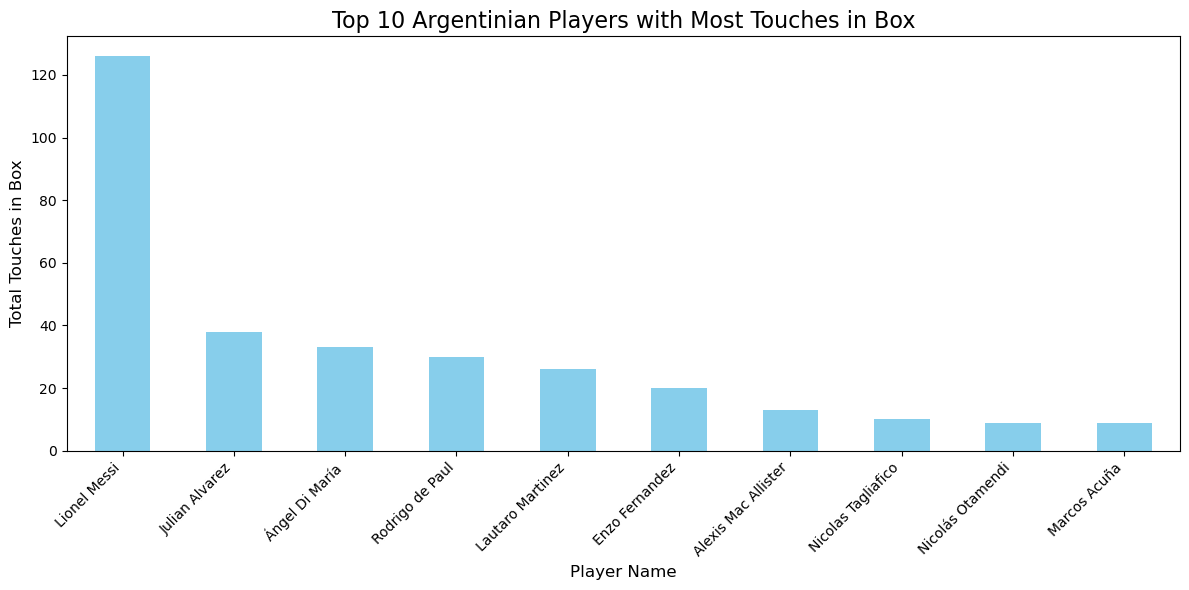

Top 10 Argentinian Players with the Most Touches in Box:
player_name
Lionel Messi           126.0
Julian Alvarez          38.0
Ángel Di María          33.0
Rodrigo de Paul         30.0
Lautaro Martinez        26.0
Enzo Fernandez          20.0
Alexis Mac Allister     13.0
Nicolas Tagliafico      10.0
Nicolás Otamendi         9.0
Marcos Acuña             9.0
Name: touchesInBox, dtype: float64


In [173]:
# Check if 'touchesInBox' column exists
if 'touchesInBox' in argentina_only.columns:
    # Group by player and sum touchesInBox
    touches_summary = argentina_only.groupby('player_name')['touchesInBox'].sum().sort_values(ascending=False)

    # Filter for the top 10 players
    top_touches = touches_summary.head(10)

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    top_touches.plot(kind='bar', color='skyblue')
    plt.title("Top 10 Argentinian Players with Most Touches in Box", fontsize=16)
    plt.xlabel("Player Name", fontsize=12)
    plt.ylabel("Total Touches in Box", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Display the summary
    print("Top 10 Argentinian Players with the Most Touches in Box:")
    print(top_touches)
else:
    print("The 'touchesInBox' column is not present in the DataFrame.")


# Making Seperate Datasets 

In [83]:
def safe_literal_eval(value):
    """
    Safely evaluates a string as a literal Python object.
    Returns the original value if evaluation fails.
    """
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return value

# List of columns to process
columns_to_process = ['grades', 'passingEvent', 'possessionEventType', 'reboundEvent', 'shootingEvent', 'ballCarryEvent', 'challengeEvent']

# Dictionary to store the resulting DataFrames
dataframes = {}

for column in columns_to_process:
    if column in argentina_events.columns:
        print(f"Processing column: {column}")
        
        # Safely evaluate strings if applicable
        argentina_events[column] = argentina_events[column].apply(
            lambda x: safe_literal_eval(x) if isinstance(x, str) else x
        )
        
        # Check if the column has data to process
        if argentina_events[column].notnull().any():
            if isinstance(argentina_events[column].dropna().iloc[0], dict):
                # Expand dictionaries into a DataFrame
                dataframes[column] = argentina_events[column].apply(pd.Series)
            elif isinstance(argentina_events[column].dropna().iloc[0], list):
                # Explode lists into rows, then expand into a DataFrame
                exploded = argentina_events[column].explode().dropna()
                dataframes[column] = exploded.apply(pd.Series)



Processing column: grades


/var/folders/3y/236mmf4j32z93jdz87cfx4dw0000gq/T/ipykernel_89653/1857712743.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  argentina_events[column] = argentina_events[column].apply(


Processing column: passingEvent
Processing column: possessionEventType
Processing column: reboundEvent
Processing column: shootingEvent
Processing column: ballCarryEvent
Processing column: challengeEvent


# Passing 

In [88]:
# Access and display the 'passingEvent' DataFrame
passing_event_df = dataframes['passingEvent']
print("\nPassing Event DataFrame:")
passing_event_df.head()


Passing Event DataFrame:


,deflectorPlayer,passOutcomeType,failedInterventionPlayer1,pressurePlayer,createsSpace,deflectorBodyType,passerPlayer,shotInitialHeightType,defenderHeightType,betterOptionType,receiverBodyType,betterOptionTime,receiverHeightType,ballHeightType,noLook,missedTouchPlayer,failedInterventionPlayer,pressureType,failedInterventionPlayer3,secondIncompletionReasonType,updatedAt,opportunityType,passHighPointType,targetPlayer,targetFacingType,passAccuracyType,advantageType,defenderPlayer,missedTouchType,shotOutcomeType,defenderBodyType,blockerPlayer,linesBrokenType,failedInterventionPlayer2,receiverFacingType,passBodyType,insertedAt,receiverPlayer,betterOptionPlayer,incompletionReasonType,passType,0
5515,None,C,None,None,None,None,"{'id': '14011', 'nickname': 'Saleh Al-Shehri'}",NaN,NaN,None,R,None,G,G,False,None,None,None,NaN,None,2022-11-22T14:56:16,None,G,"{'id': '14003', 'nickname': 'Mohamed Kanno'}",G,S,None,None,None,NaN,NaN,None,None,NaN,None,R,2022-11-22T12:49:06,"{'id': '14003', 'nickname': 'Mohamed Kanno'}",None,None,S,NaN
5516,None,C,None,None,None,None,"{'id': '14003', 'nickname': 'Mohamed Kanno'}",NaN,NaN,None,R,None,G,G,False,None,None,None,NaN,None,2022-11-22T14:56:13,None,G,"{'id': '14011', 'nickname': 'Saleh Al-Shehri'}",B,S,None,None,None,NaN,NaN,None,A,NaN,None,R,2022-11-22T12:50:47,"{'id': '14011', 'nickname': 'Saleh Al-Shehri'}",None,None,S,NaN
5517,None,C,None,None,None,None,"{'id': '14011', 'nickname': 'Saleh Al-Shehri'}",NaN,NaN,None,R,None,G,G,False,None,None,None,NaN,None,2022-11-22T14:56:11,None,G,"{'id': '14003', 'nickname': 'Mohamed Kanno'}",G,S,None,None,None,NaN,NaN,None,None,NaN,None,R,2022-11-22T12:50:27,"{'id': '14003', 'nickname': 'Mohamed Kanno'}",None,None,S,NaN
5518,None,C,None,None,None,None,"{'id': '14003', 'nickname': 'Mohamed Kanno'}",NaN,NaN,None,R,None,G,G,False,None,None,None,NaN,None,2022-11-22T14:56:11,None,G,"{'id': '13996', 'nickname': 'Hassan Tambakti'}",G,S,None,None,None,NaN,NaN,None,None,NaN,None,R,2022-11-22T12:51:06,"{'id': '13996', 'nickname': 'Hassan Tambakti'}",None,None,S,NaN
5519,None,D,None,"{'id': '8138', 'nickname': 'Lautaro Martinez'}",None,None,"{'id': '13996', 'nickname': 'Hassan Tambakti'}",NaN,NaN,None,None,None,None,G,False,None,None,P,NaN,UH,2022-11-22T14:56:13,None,A,"{'id': '13999', 'nickname': 'Salman Al-Faraj'}",G,None,None,"{'id': '8025', 'nickname': 'Nicolas Tagliafico'}",None,NaN,NaN,None,None,NaN,None,R,2022-11-22T12:51:19,None,None,DI,O,NaN


In [90]:
# Columns to process
columns_to_process = ['receiverPlayer', 'passerPlayer', 'pressurePlayer']

# Loop through the columns to extract 'nickname' and drop the original columns
for column in columns_to_process:
    if column in passing_event_df.columns:
        # Extract nickname and create a new column with '_name' suffix
        passing_event_df[f"{column}_name"] = passing_event_df[column].apply(
            lambda x: x.get('nickname') if isinstance(x, dict) else None
        )

# Drop the original columns
passing_event_df = passing_event_df.drop(columns=columns_to_process, errors='ignore')


passing_event_df.head()


,deflectorPlayer,passOutcomeType,failedInterventionPlayer1,createsSpace,deflectorBodyType,shotInitialHeightType,defenderHeightType,betterOptionType,receiverBodyType,betterOptionTime,receiverHeightType,ballHeightType,noLook,missedTouchPlayer,failedInterventionPlayer,pressureType,failedInterventionPlayer3,secondIncompletionReasonType,updatedAt,opportunityType,passHighPointType,targetPlayer,targetFacingType,passAccuracyType,advantageType,defenderPlayer,missedTouchType,shotOutcomeType,defenderBodyType,blockerPlayer,linesBrokenType,failedInterventionPlayer2,receiverFacingType,passBodyType,insertedAt,betterOptionPlayer,incompletionReasonType,passType,0,receiverPlayer_name,passerPlayer_name,pressurePlayer_name
5515,None,C,None,None,None,NaN,NaN,None,R,None,G,G,False,None,None,None,NaN,None,2022-11-22T14:56:16,None,G,"{'id': '14003', 'nickname': 'Mohamed Kanno'}",G,S,None,None,None,NaN,NaN,None,None,NaN,None,R,2022-11-22T12:49:06,None,None,S,NaN,Mohamed Kanno,Saleh Al-Shehri,None
5516,None,C,None,None,None,NaN,NaN,None,R,None,G,G,False,None,None,None,NaN,None,2022-11-22T14:56:13,None,G,"{'id': '14011', 'nickname': 'Saleh Al-Shehri'}",B,S,None,None,None,NaN,NaN,None,A,NaN,None,R,2022-11-22T12:50:47,None,None,S,NaN,Saleh Al-Shehri,Mohamed Kanno,None
5517,None,C,None,None,None,NaN,NaN,None,R,None,G,G,False,None,None,None,NaN,None,2022-11-22T14:56:11,None,G,"{'id': '14003', 'nickname': 'Mohamed Kanno'}",G,S,None,None,None,NaN,NaN,None,None,NaN,None,R,2022-11-22T12:50:27,None,None,S,NaN,Mohamed Kanno,Saleh Al-Shehri,None
5518,None,C,None,None,None,NaN,NaN,None,R,None,G,G,False,None,None,None,NaN,None,2022-11-22T14:56:11,None,G,"{'id': '13996', 'nickname': 'Hassan Tambakti'}",G,S,None,None,None,NaN,NaN,None,None,NaN,None,R,2022-11-22T12:51:06,None,None,S,NaN,Hassan Tambakti,Mohamed Kanno,None
5519,None,D,None,None,None,NaN,NaN,None,None,None,None,G,False,None,None,P,NaN,UH,2022-11-22T14:56:13,None,A,"{'id': '13999', 'nickname': 'Salman Al-Faraj'}",G,None,None,"{'id': '8025', 'nickname': 'Nicolas Tagliafico'}",None,NaN,NaN,None,None,NaN,None,R,2022-11-22T12:51:19,None,DI,O,NaN,None,Hassan Tambakti,Lautaro Martinez


In [102]:
# Mapping dictionary for relabeling
opportunity_type_mapping = {
    'C': 'Chance Created',
    'D': 'Dangerous Position',
    'H': 'Half Chance',
    'N': 'Negative Chance',
    'P': 'Negative Dangerous Position'
}

# Check if 'opportunityType' column exists
if 'opportunityType' in passing_event_df.columns:
    # Apply the mapping to relabel the column
    passing_event_df['opportunityType'] = passing_event_df['opportunityType'].map(opportunity_type_mapping)

    # Display the first few rows to verify the relabeling
    print("Relabeled 'opportunityType' column:")
    print(passing_event_df['opportunityType'].head())
else:
    print("'opportunityType' column is not present in the DataFrame.")


Relabeled 'opportunityType' column:
5515    NaN
5516    NaN
5517    NaN
5518    NaN
5519    NaN
Name: opportunityType, dtype: object


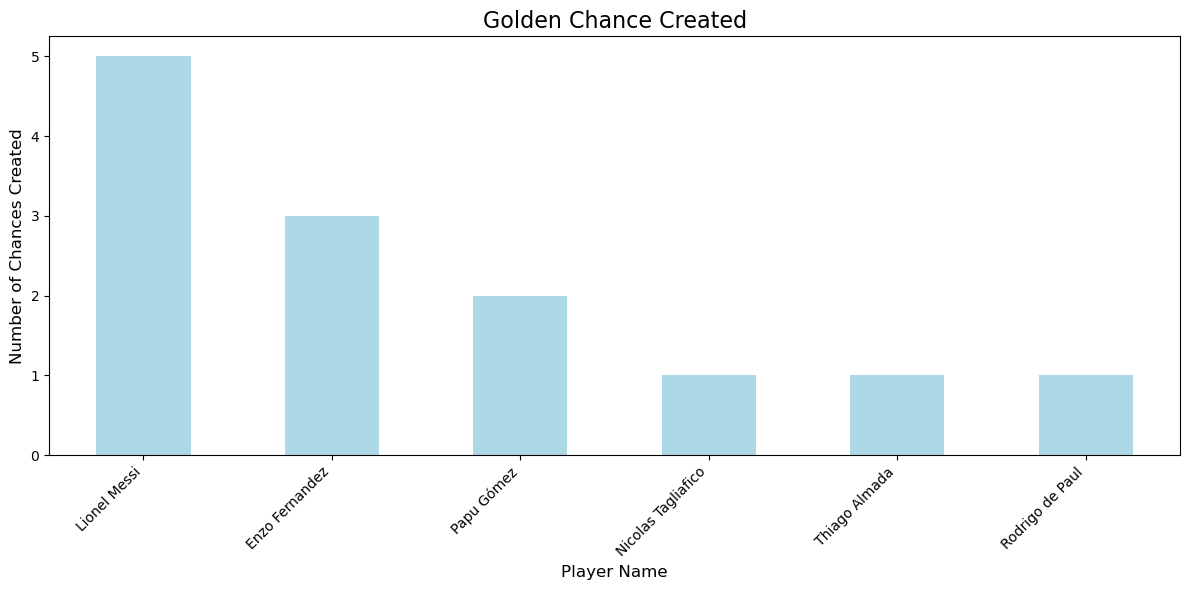

Top 6 Players by Chances Created:
passerPlayer_name
Lionel Messi          5
Enzo Fernandez        3
Papu Gómez            2
Nicolas Tagliafico    1
Thiago Almada         1
Rodrigo de Paul       1
Name: count, dtype: int64


In [181]:
# Check if required columns exist
if {'opportunityType', 'passerPlayer_name'}.issubset(passing_event_df.columns):
    # Filter rows where opportunityType is 'Chance Created'
    chance_creation = passing_event_df[passing_event_df['opportunityType'] == 'Chance Created']

    # Count chances created by each player (passerPlayer_name) and keep the top 6
    chances_by_player = chance_creation['passerPlayer_name'].value_counts().head(6)

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    chances_by_player.plot(kind='bar', color='lightblue')
    plt.title("Golden Chance Created", fontsize=16)
    plt.xlabel("Player Name", fontsize=12)
    plt.ylabel("Number of Chances Created", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Print the top players with the most chances created
    print("Top 6 Players by Chances Created:")
    print(chances_by_player)
else:
    print("Required columns 'opportunityType' or 'passerPlayer_name' are not present in the DataFrame.")


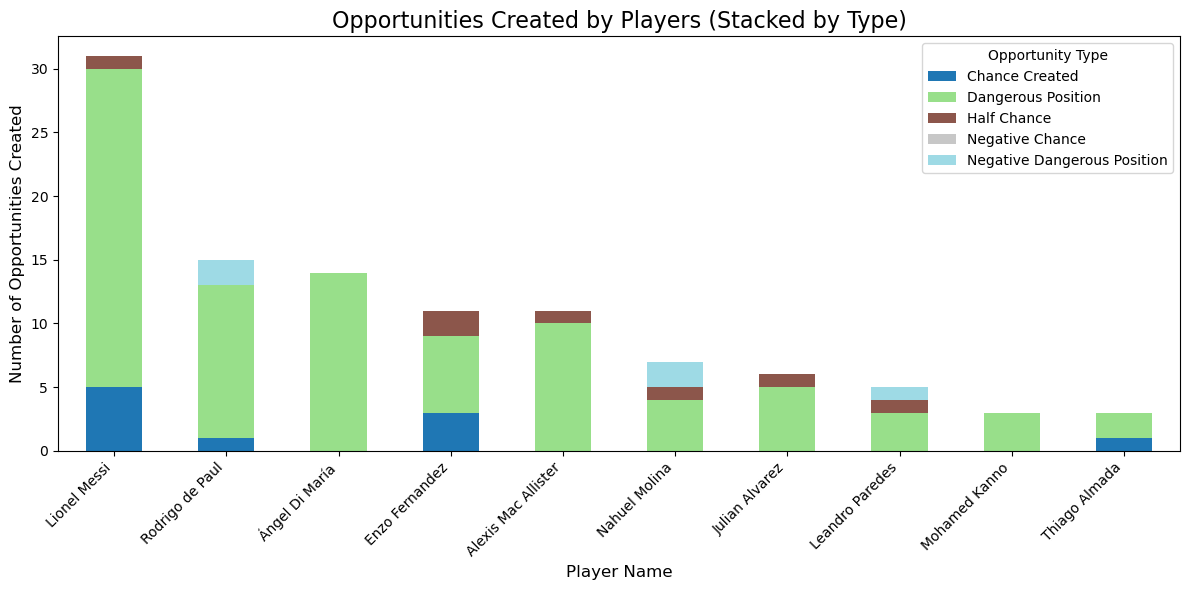

Opportunity Type Counts by Top Players:
opportunityType      Chance Created  Dangerous Position  Half Chance  \
passerPlayer_name                                                      
Lionel Messi                      5                  25            1   
Rodrigo de Paul                   1                  12            0   
Ángel Di María                    0                  14            0   
Enzo Fernandez                    3                   6            2   
Alexis Mac Allister               0                  10            1   
Nahuel Molina                     0                   4            1   
Julian Alvarez                    0                   5            1   
Leandro Paredes                   0                   3            1   
Mohamed Kanno                     0                   3            0   
Thiago Almada                     1                   2            0   

opportunityType      Negative Chance  Negative Dangerous Position  
passerPlayer_name          

In [116]:
# Check if required columns exist
if {'opportunityType', 'passerPlayer_name'}.issubset(passing_event_df.columns):
    # Group by passerPlayer_name and opportunityType, count occurrences
    opportunity_counts = passing_event_df.groupby(['passerPlayer_name', 'opportunityType']).size().unstack(fill_value=0)

    # Filter to the top players (e.g., top 10 by total opportunities created)
    top_players = opportunity_counts.sum(axis=1).sort_values(ascending=False).head(10)
    opportunity_counts_top = opportunity_counts.loc[top_players.index]

    # Plot the stacked bar chart
    opportunity_counts_top.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='tab20')
    plt.title("Opportunities Created by Players (Stacked by Type)", fontsize=16)
    plt.xlabel("Player Name", fontsize=12)
    plt.ylabel("Number of Opportunities Created", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Opportunity Type", fontsize=10)
    plt.tight_layout()
    plt.show()

    # Print the top players and their breakdown of opportunity types
    print("Opportunity Type Counts by Top Players:")
    print(opportunity_counts_top)
else:
    print("Required columns 'opportunityType' or 'passerPlayer_name' are not present in the DataFrame.")


In [98]:
# Mapping dictionary for relabeling
lines_broken_mapping = {
    'A': 'Attack',
    'AD': 'Attack and Defense',
    'AM': 'Attack and Midfield',
    'AMD': 'Attack, Midfield and Defense',
    'D': 'Defense',
    'M': 'Midfield',
    'MD': 'Midfield and Defense'
}

# Check if 'linesBrokenType' column exists
if 'linesBrokenType' in passing_event_df.columns:
    # Apply the mapping to relabel the column
    passing_event_df['linesBrokenType'] = passing_event_df['linesBrokenType'].map(lines_broken_mapping)

    # Display the first few rows to verify the relabeling
    print("Relabeled 'linesBrokenType' column:")
    print(passing_event_df['linesBrokenType'].head())
else:
    print("'linesBrokenType' column is not present in the DataFrame.")


Relabeled 'linesBrokenType' column:
5515       NaN
5516    Attack
5517       NaN
5518       NaN
5519       NaN
Name: linesBrokenType, dtype: object


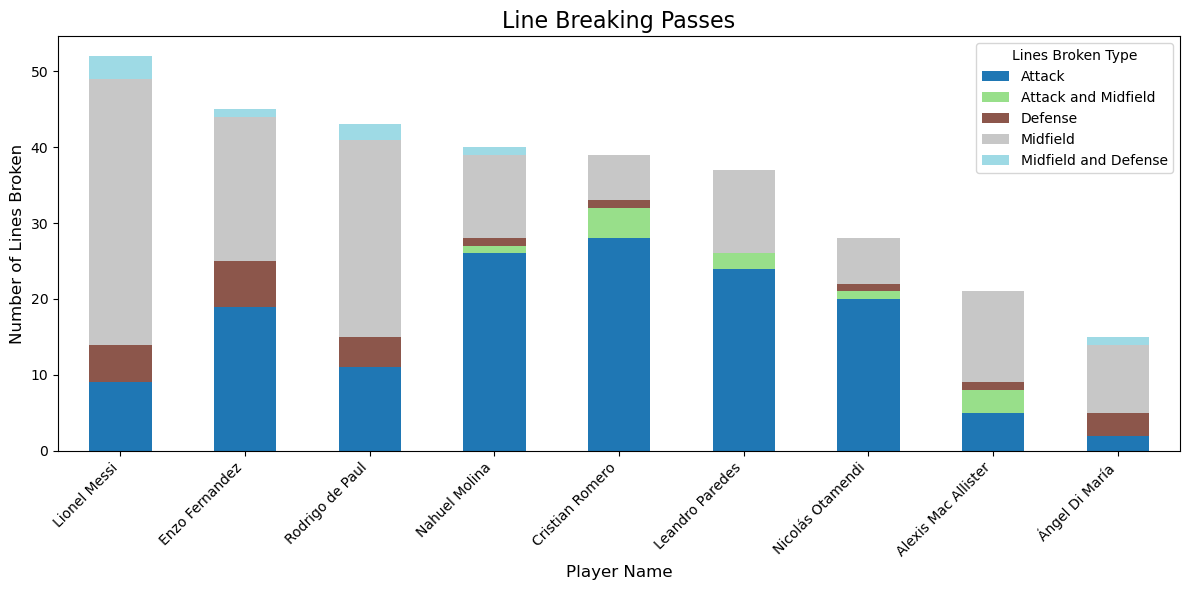

Lines Broken Type Counts by Top Players:
linesBrokenType      Attack  Attack and Midfield  Defense  Midfield  \
passerPlayer_name                                                     
Lionel Messi              9                    0        5        35   
Enzo Fernandez           19                    0        6        19   
Rodrigo de Paul          11                    0        4        26   
Nahuel Molina            26                    1        1        11   
Cristian Romero          28                    4        1         6   
Leandro Paredes          24                    2        0        11   
Nicolás Otamendi         20                    1        1         6   
Alexis Mac Allister       5                    3        1        12   
Ángel Di María            2                    0        3         9   

linesBrokenType      Midfield and Defense  
passerPlayer_name                          
Lionel Messi                            3  
Enzo Fernandez                          1  
R

In [217]:
# Check if required columns exist
if {'linesBrokenType', 'passerPlayer_name'}.issubset(passing_event_df.columns):
    # Group by passerPlayer_name and linesBrokenType, count occurrences
    lines_broken_counts = passing_event_df.groupby(['passerPlayer_name', 'linesBrokenType']).size().unstack(fill_value=0)

    # Filter to the top players (e.g., top 9 by total lines broken)
    top_players = lines_broken_counts.sum(axis=1).sort_values(ascending=False).head(9)
    lines_broken_counts_top = lines_broken_counts.loc[top_players.index]

    # Plot the stacked bar chart
    lines_broken_counts_top.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='tab20')
    plt.title("Line Breaking Passes", fontsize=16)
    plt.xlabel("Player Name", fontsize=12)
    plt.ylabel("Number of Lines Broken", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Lines Broken Type", fontsize=10)
    plt.tight_layout()
    plt.show()

    # Print the top players and their breakdown of lines broken types
    print("Lines Broken Type Counts by Top Players:")
    print(lines_broken_counts_top)
else:
    print("Required columns 'linesBrokenType' or 'passerPlayer_name' are not present in the DataFrame.")


# Interactions with Messi 

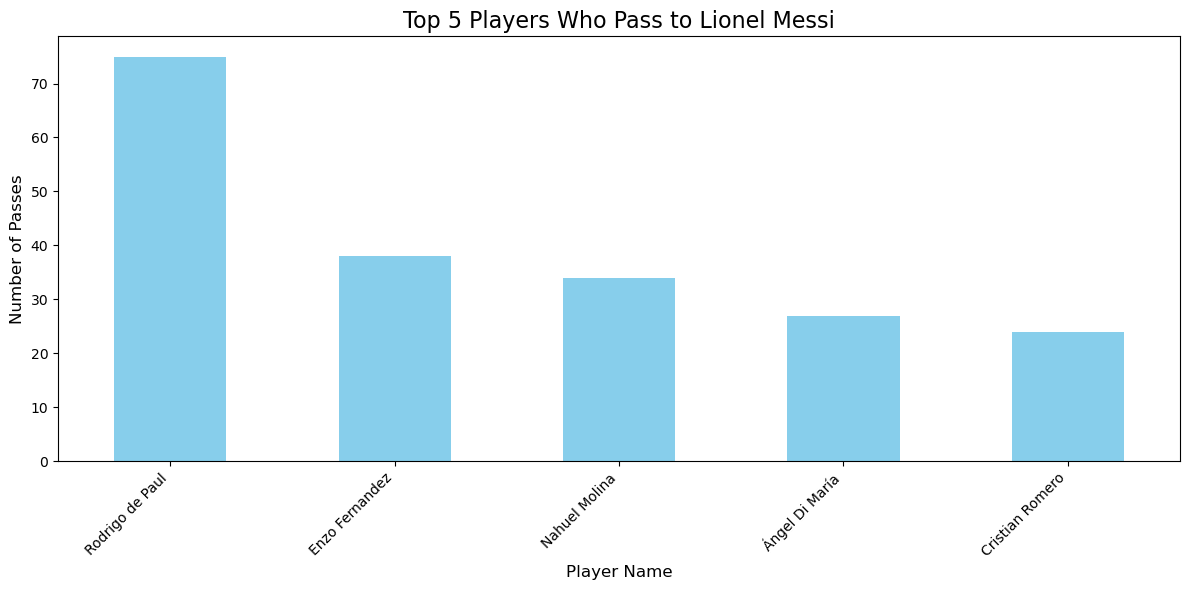

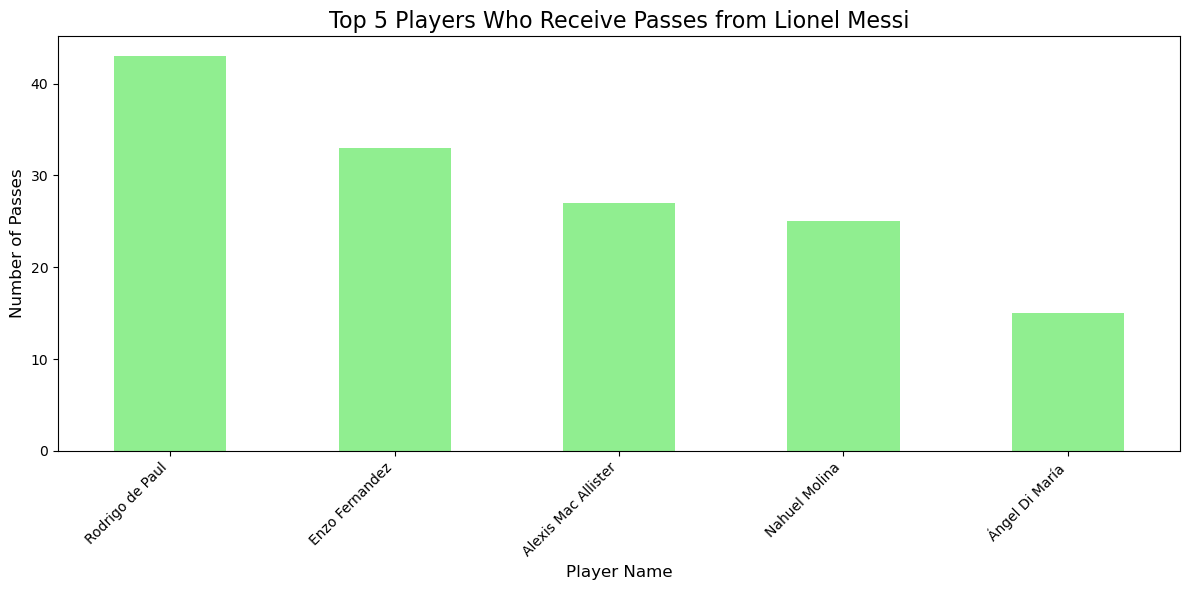

In [118]:
# Ensure required columns exist
if 'passerPlayer_name' in passing_event_df.columns and 'receiverPlayer_name' in passing_event_df.columns:
    # Filter for passes to Messi
    passes_to_messi = passing_event_df[passing_event_df['receiverPlayer_name'] == 'Lionel Messi']
    top_passers_to_messi = passes_to_messi['passerPlayer_name'].value_counts().head(5)

    # Filter for passes from Messi
    passes_from_messi = passing_event_df[passing_event_df['passerPlayer_name'] == 'Lionel Messi']
    top_receivers_from_messi = passes_from_messi['receiverPlayer_name'].value_counts().head(5)

    # Plot the top 5 players who pass to Messi
    plt.figure(figsize=(12, 6))
    top_passers_to_messi.plot(kind='bar', color='skyblue')
    plt.title("Top 5 Players Who Pass to Lionel Messi", fontsize=16)
    plt.xlabel("Player Name", fontsize=12)
    plt.ylabel("Number of Passes", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Plot the top 5 players who receive passes from Messi
    plt.figure(figsize=(12, 6))
    top_receivers_from_messi.plot(kind='bar', color='lightgreen')
    plt.title("Top 5 Players Who Receive Passes from Lionel Messi", fontsize=16)
    plt.xlabel("Player Name", fontsize=12)
    plt.ylabel("Number of Passes", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

else:
    print("Required columns 'passerPlayer_name' or 'receiverPlayer_name' are not present in the DataFrame.")


# Ball Carrying Actions 

In [122]:
# Access and display the 'ballCarryEvent' DataFrame
ball_carry_event_df = dataframes['ballCarryEvent']
print("\nBall Carry Event DataFrame:")
ball_carry_event_df.head()


Ball Carry Event DataFrame:


,0,additionalChallenger1,additionalChallenger2,additionalChallenger3,advantageType,ballCarrierPlayer,ballCarryOutcome,ballCarryType,betterOptionPlayer,betterOptionTime,betterOptionType,carryType,createsSpace,defenderPlayer,id,insertedAt,linesBrokenType,opportunityType,pressurePlayer,touchOutcomeType,touchType,updatedAt
5515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
# Filter rows where 'ballCarryType' is not null
ball_carry_event_df = ball_carry_event_df[ball_carry_event_df['ballCarryType'].notnull()]


In [126]:
ball_carry_event_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 5565 to 88374
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   0                      0 non-null      float64
 1   additionalChallenger1  0 non-null      float64
 2   additionalChallenger2  0 non-null      float64
 3   additionalChallenger3  0 non-null      float64
 4   advantageType          5 non-null      object 
 5   ballCarrierPlayer      204 non-null    object 
 6   ballCarryOutcome       90 non-null     object 
 7   ballCarryType          204 non-null    object 
 8   betterOptionPlayer     0 non-null      float64
 9   betterOptionTime       0 non-null      float64
 10  betterOptionType       0 non-null      float64
 11  carryType              90 non-null     object 
 12  createsSpace           0 non-null      float64
 13  defenderPlayer         90 non-null     object 
 14  id                     204 non-null    object 
 15  insert

In [128]:
# Filter rows where 'ballCarrierPlayer' is not null
ball_carry_event_df = ball_carry_event_df[ball_carry_event_df['ballCarrierPlayer'].notnull()]

# Extract the 'nickname' from the 'ballCarrierPlayer' column
ball_carry_event_df['ballCarrierPlayer_name'] = ball_carry_event_df['ballCarrierPlayer'].apply(
    lambda x: x.get('nickname') if isinstance(x, dict) else None
)

# Drop the original 'ballCarrierPlayer' column if no longer needed
ball_carry_event_df = ball_carry_event_df.drop(columns=['ballCarrierPlayer'], errors='ignore')



In [130]:
ball_carry_event_df.head()

,0,additionalChallenger1,additionalChallenger2,additionalChallenger3,advantageType,ballCarryOutcome,ballCarryType,betterOptionPlayer,betterOptionTime,betterOptionType,carryType,createsSpace,defenderPlayer,id,insertedAt,linesBrokenType,opportunityType,pressurePlayer,touchOutcomeType,touchType,updatedAt,ballCarrierPlayer_name
5565,NaN,NaN,NaN,NaN,None,None,T,NaN,NaN,NaN,None,NaN,None,296526,2022-11-22T13:06:27,None,None,None,P,H,2022-11-25T13:14:24,Salem Al-Dawsari
5600,NaN,NaN,NaN,NaN,N,None,T,NaN,NaN,NaN,None,NaN,None,296552,2022-11-22T13:24:24,None,None,None,P,F,2022-11-22T13:24:50,Mohamed Kanno
5665,NaN,NaN,NaN,NaN,None,None,T,NaN,NaN,NaN,None,NaN,None,296565,2022-11-22T13:33:31,None,None,None,O,F,2022-11-22T13:46:41,Ángel Di María
5694,NaN,NaN,NaN,NaN,None,None,T,NaN,NaN,NaN,None,NaN,None,297980,2022-11-25T13:10:02,None,None,None,P,F,2022-11-25T13:10:11,Leandro Paredes
5718,NaN,NaN,NaN,NaN,None,F,C,NaN,NaN,NaN,B,NaN,"{'id': '6895', 'nickname': 'Rodrigo de Paul'}",296521,2022-11-22T13:04:14,M,None,None,None,None,2024-07-02T17:50:25,Mohamed Kanno


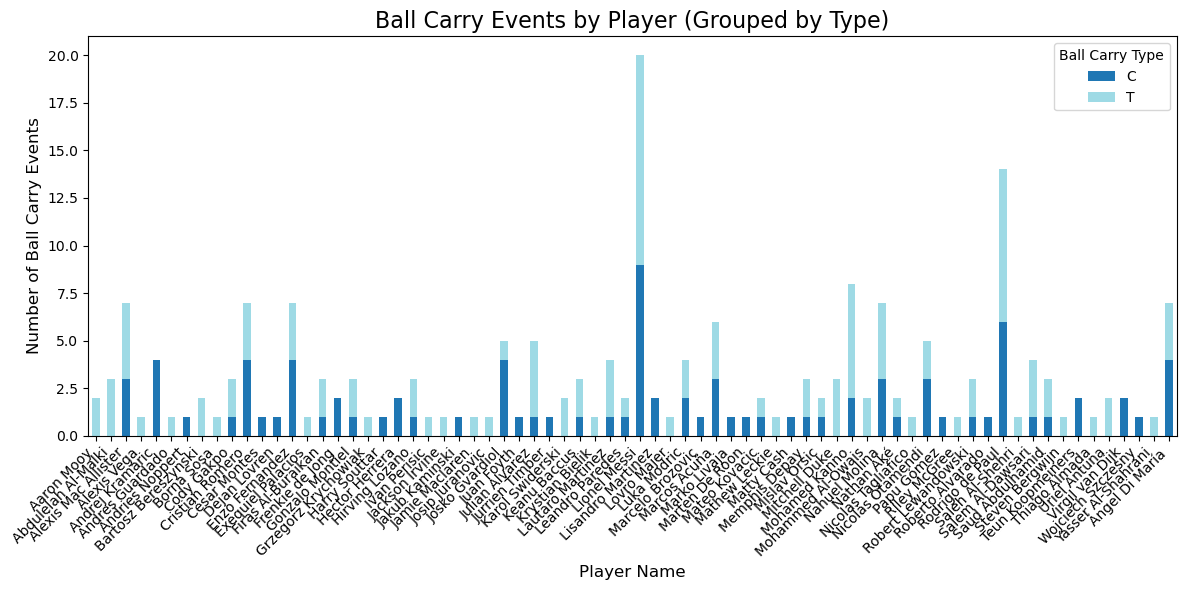

In [134]:
# Group by player and count occurrences of ballCarryType
grouped_data = ball_carry_event_df.groupby(['ballCarrierPlayer_name', 'ballCarryType']).size().unstack(fill_value=0)

# Plot the stacked bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='tab20')
plt.title("Ball Carry Events by Player (Grouped by Type)", fontsize=16)
plt.xlabel("Player Name", fontsize=12)
plt.ylabel("Number of Ball Carry Events", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Ball Carry Type", fontsize=10)
plt.tight_layout()
plt.show()


# Shooting 

In [191]:
# Access and display the 'passingEvent' DataFrame
shooting_event_df = dataframes['shootingEvent']
print("\nShooting Event DataFrame:")
shooting_event_df.head()


Shooting Event DataFrame:


,deflectorPlayer,failedInterventionPlayer1,pressurePlayer,shotType,shotBodyType,createsSpace,deflectorBodyType,saveable,shotInitialHeightType,betterOptionType,betterOptionTime,ballHeightType,noLook,missedTouchPlayer,failedInterventionPlayer,pressureType,keeperTouchType,shooterPlayer,failedInterventionPlayer3,bodyMovementType,ballMoving,updatedAt,saverPlayer,advantageType,badParry,saveHeightType,missedTouchType,shotOutcomeType,saveReboundType,blockerPlayer,shotNatureType,clearerPlayer,failedInterventionPlayer2,insertedAt,betterOptionPlayer,0,shooterPlayer_name
5515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
5516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
5517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
5518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
5519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [193]:
shooting_event_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9870 entries, 5515 to 88438
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   deflectorPlayer            5 non-null      object 
 1   failedInterventionPlayer1  10 non-null     object 
 2   pressurePlayer             54 non-null     object 
 3   shotType                   134 non-null    object 
 4   shotBodyType               134 non-null    object 
 5   createsSpace               12 non-null     object 
 6   deflectorBodyType          3 non-null      object 
 7   saveable                   17 non-null     object 
 8   shotInitialHeightType      134 non-null    object 
 9   betterOptionType           18 non-null     object 
 10  betterOptionTime           18 non-null     object 
 11  ballHeightType             134 non-null    object 
 12  noLook                     134 non-null    object 
 13  missedTouchPlayer          1 non-null      object

In [195]:
# Filter rows where 'shotType' is not null
filtered_shooting_event_df = shooting_event_df[shooting_event_df['shotType'].notnull()]

In [197]:
# Check if 'shooterPlayer' column exists
if 'shooterPlayer' in shooting_event_df.columns:
    # Extract the 'nickname' from the 'shooterPlayer' column
    shooting_event_df['shooterPlayer_name'] = shooting_event_df['shooterPlayer'].apply(
        lambda x: x.get('nickname') if isinstance(x, dict) else None
    )

    # Drop the original 'shooterPlayer' column if no longer needed
    shooting_event_df = shooting_event_df.drop(columns=['shooterPlayer'], errors='ignore')

    # Display the updated DataFrame
    print("Updated Shooting Event DataFrame with Shooter Name:")
    print(shooting_event_df.info())


Updated Shooting Event DataFrame with Shooter Name:
<class 'pandas.core.frame.DataFrame'>
Index: 9870 entries, 5515 to 88438
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   deflectorPlayer            5 non-null      object 
 1   failedInterventionPlayer1  10 non-null     object 
 2   pressurePlayer             54 non-null     object 
 3   shotType                   134 non-null    object 
 4   shotBodyType               134 non-null    object 
 5   createsSpace               12 non-null     object 
 6   deflectorBodyType          3 non-null      object 
 7   saveable                   17 non-null     object 
 8   shotInitialHeightType      134 non-null    object 
 9   betterOptionType           18 non-null     object 
 10  betterOptionTime           18 non-null     object 
 11  ballHeightType             134 non-null    object 
 12  noLook                     134 non-null    object 
 1

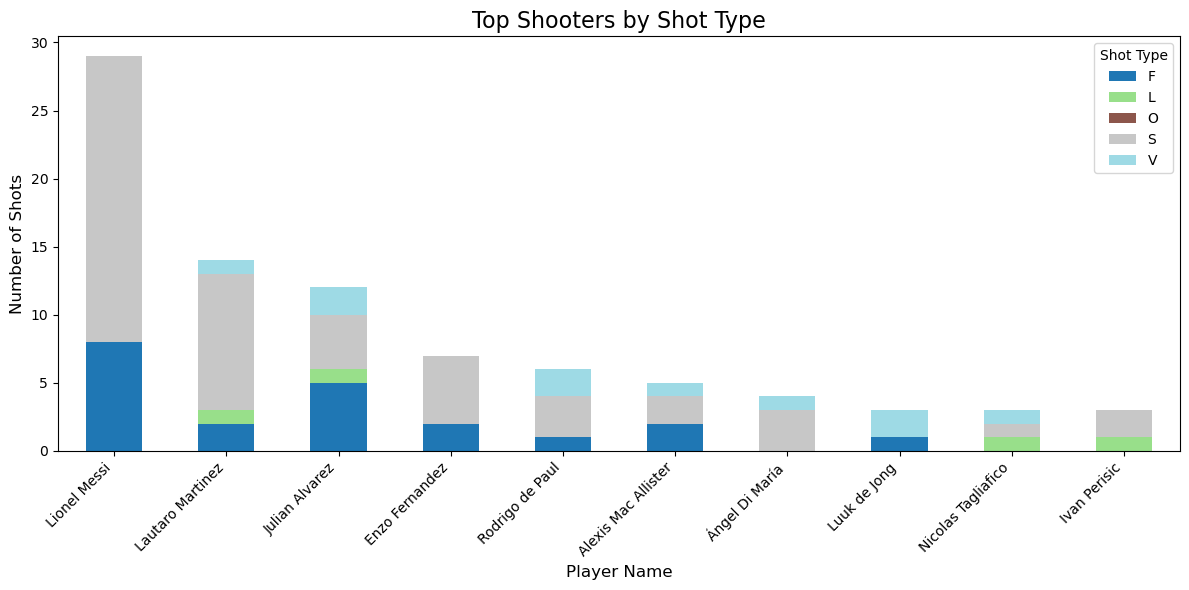

Top Players by Total Shots:
shooterPlayer_name
Lionel Messi           29
Lautaro Martinez       14
Julian Alvarez         12
Enzo Fernandez          7
Rodrigo de Paul         6
Alexis Mac Allister     5
Ángel Di María          4
Luuk de Jong            3
Nicolas Tagliafico      3
Ivan Perisic            3
dtype: int64


In [199]:
# Group by shooterPlayer_name and count occurrences of shotType
shots_by_player = shooting_event_df.groupby(['shooterPlayer_name', 'shotType']).size().unstack(fill_value=0)

# Identify players with the most total shots
top_shooters = shots_by_player.sum(axis=1).sort_values(ascending=False).head(10)
top_shots_by_player = shots_by_player.loc[top_shooters.index]

# Plot the stacked bar chart
top_shots_by_player.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='tab20')
plt.title("Top Shooters by Shot Type", fontsize=16)
plt.xlabel("Player Name", fontsize=12)
plt.ylabel("Number of Shots", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Shot Type", fontsize=10)
plt.tight_layout()
plt.show()

# Print the players with the most shots
print("Top Players by Total Shots:")
print(top_shooters)


In [201]:
# Mapping dictionary for remapping
shot_outcome_mapping = {
    'B': 'Block on Target',
    'C': 'Block off Target',
    'F': 'Save off Target',
    'G': 'Goal',
    'L': 'Goalline Clearance',
    'O': 'Off Target',
    'S': 'Save on Target'
}

# Check if 'shotOutcomeType' column exists
if 'shotOutcomeType' in shooting_event_df.columns:
    # Apply the mapping to remap the column
    shooting_event_df['shotOutcomeType'] = shooting_event_df['shotOutcomeType'].map(shot_outcome_mapping)

    # Display the first few rows to verify the remapping
    print("Remapped 'shotOutcomeType' column:")
    print(shooting_event_df['shotOutcomeType'].head())
else:
    print("'shotOutcomeType' column is not present in the DataFrame.")


Remapped 'shotOutcomeType' column:
5515    NaN
5516    NaN
5517    NaN
5518    NaN
5519    NaN
Name: shotOutcomeType, dtype: object


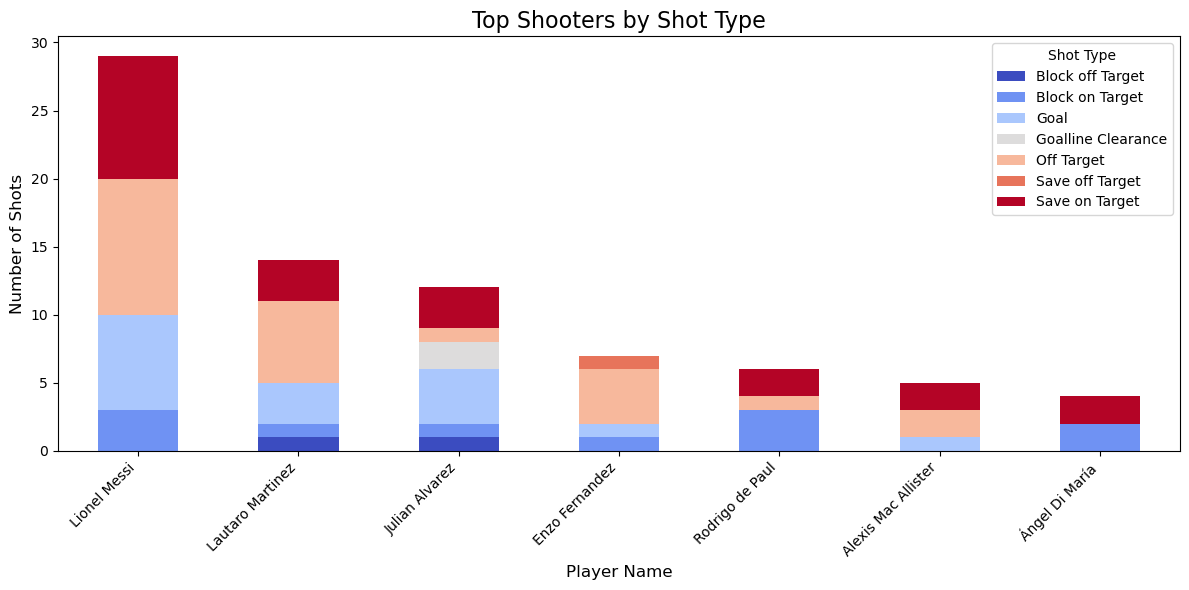

Top 7 Players by Total Shots:
shooterPlayer_name
Lionel Messi           29
Lautaro Martinez       14
Julian Alvarez         12
Enzo Fernandez          7
Rodrigo de Paul         6
Alexis Mac Allister     5
Ángel Di María          4
dtype: int64


In [223]:
# Group by shooterPlayer_name and count occurrences of shotOutcomeType
shots_by_player = shooting_event_df.groupby(['shooterPlayer_name', 'shotOutcomeType']).size().unstack(fill_value=0)

# Identify players with the most total shots
top_shooters = shots_by_player.sum(axis=1).sort_values(ascending=False).head(7)
top_shots_by_player = shots_by_player.loc[top_shooters.index]

# Plot the stacked bar chart with improved color scale
top_shots_by_player.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='coolwarm')
plt.title("Top Shooters by Shot Type", fontsize=16)
plt.xlabel("Player Name", fontsize=12)
plt.ylabel("Number of Shots", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Shot Type", fontsize=10)
plt.tight_layout()
plt.show()

# Print the players with the most shots
print("Top 7 Players by Total Shots:")
print(top_shooters)
